In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/sierraleone-bumbuna.csv")  # adjust to actual filename
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [3]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

,count,mean,std,min,25%,50%,75%,max
GHI,525600.0,201.957515,298.495150,-19.5,-2.8,0.3,362.4,1499.0
DNI,525600.0,116.376337,218.652659,-7.8,-0.3,-0.1,107.0,946.0
DHI,525600.0,113.720571,158.946032,-17.9,-3.8,-0.1,224.7,892.0
ModA,525600.0,206.643095,300.896893,0.0,0.0,3.6,359.5,1507.0
ModB,525600.0,198.114691,288.889073,0.0,0.0,3.4,345.4,1473.0
Tamb,525600.0,26.319394,4.398605,12.3,23.1,25.3,29.4,39.9
RH,525600.0,79.448857,20.520775,9.9,68.7,85.4,96.7,100.0
WS,525600.0,1.146113,1.239248,0.0,0.0,0.8,2.0,19.2
WSgust,525600.0,1.691606,1.617053,0.0,0.0,1.6,2.6,23.9
WSstdev,525600.0,0.363823,0.295000,0.0,0.0,0.4,0.6,4.1


In [4]:
missing = df.isna().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100
pd.DataFrame({"Missing Values": missing, "%": missing_percent})

,Missing Values,%
Comments,525600,100.0
GHI,0,0.0
Timestamp,0,0.0
DNI,0,0.0
DHI,0,0.0
ModB,0,0.0
ModA,0,0.0
RH,0,0.0
WS,0,0.0
WSgust,0,0.0


In [5]:
high_nulls = missing_percent[missing_percent > 5]
high_nulls

Comments    100.0
dtype: float64

In [6]:
key_cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

In [7]:
z_scores = np.abs(stats.zscore(df[key_cols], nan_policy="omit"))
outliers = (z_scores > 3).sum()
pd.DataFrame({"Column": key_cols, "Outliers": outliers})

,Column,Outliers
0,GHI,24326
1,DNI,24326
2,DHI,24326
3,ModA,24326
4,ModB,24326
5,WS,24326
6,WSgust,24326


In [8]:
df_clean = df[(z_scores < 3).all(axis=1)]

In [9]:
df_clean[key_cols] = df_clean[key_cols].fillna(df_clean[key_cols].median())

In [12]:
df_clean.to_csv("../data/sierraleone_clean.csv", index=False)

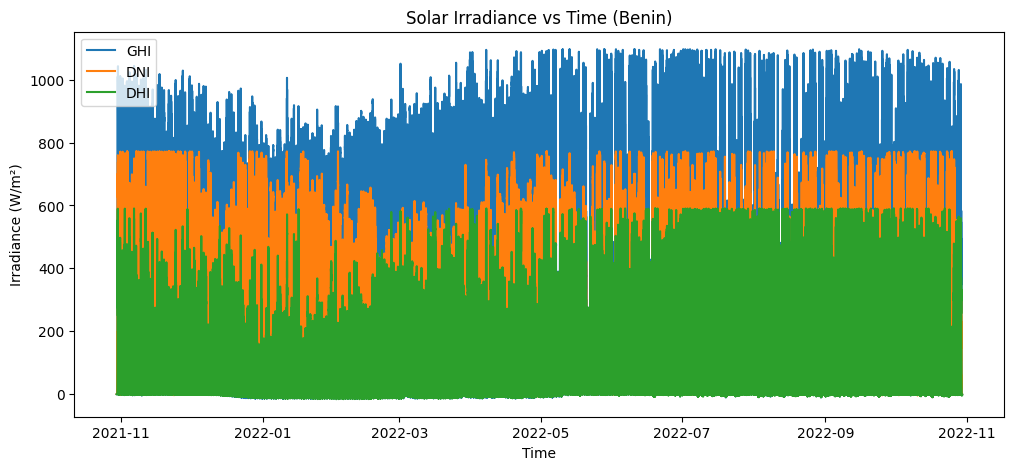

In [13]:
df_clean["Timestamp"] = pd.to_datetime(df_clean["Timestamp"])
plt.figure(figsize=(12, 5))
plt.plot(df_clean["Timestamp"], df_clean["GHI"], label="GHI")
plt.plot(df_clean["Timestamp"], df_clean["DNI"], label="DNI")
plt.plot(df_clean["Timestamp"], df_clean["DHI"], label="DHI")
plt.legend()
plt.title("Solar Irradiance vs Time (Benin)")
plt.xlabel("Time")
plt.ylabel("Irradiance (W/m²)")
plt.show()

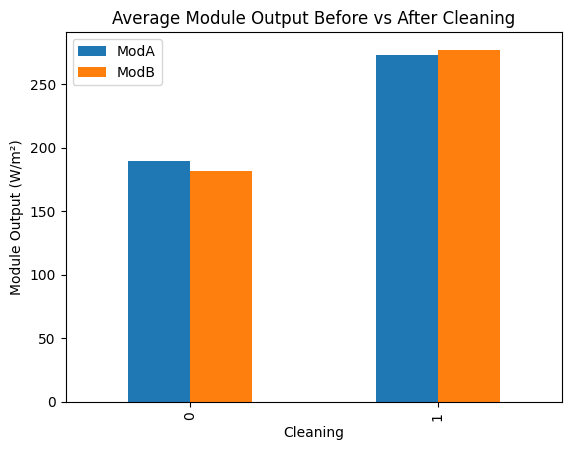

In [14]:
if "Cleaning" in df_clean.columns:
    df_clean.groupby("Cleaning")[["ModA", "ModB"]].mean().plot(kind="bar")
    plt.title("Average Module Output Before vs After Cleaning")
    plt.ylabel("Module Output (W/m²)")
    plt.show()

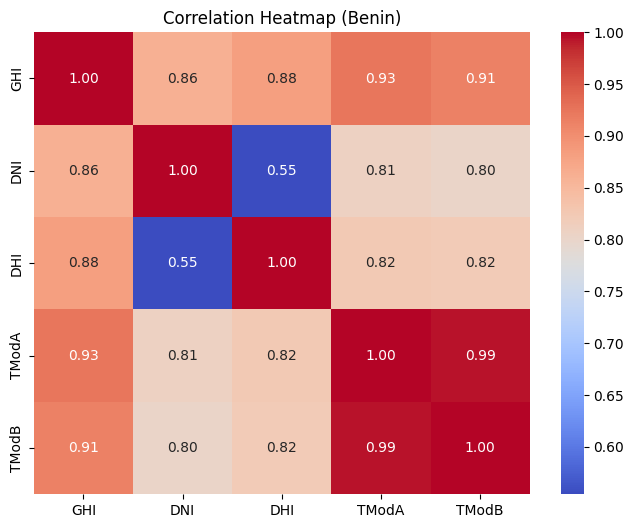

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean[["GHI", "DNI", "DHI", "TModA", "TModB"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Benin)")
plt.show()

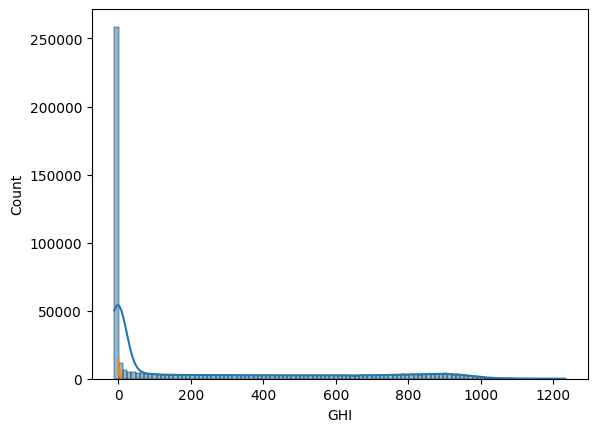

In [15]:
sns.histplot(df_clean["GHI"], kde=True)
sns.histplot(df_clean["WS"], kde=True)
plt.show()

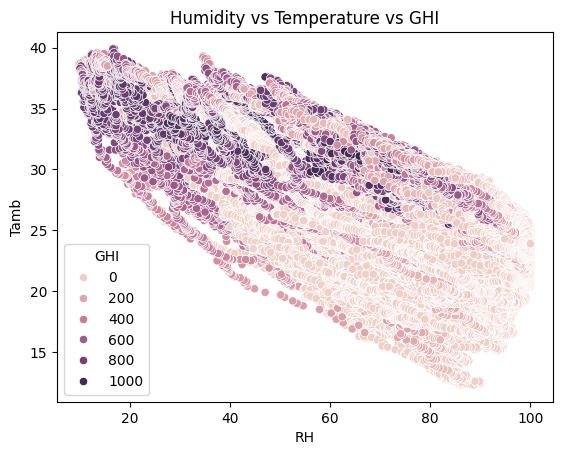

In [16]:
sns.scatterplot(x="RH", y="Tamb", data=df_clean, hue="GHI")
plt.title("Humidity vs Temperature vs GHI")
plt.show()

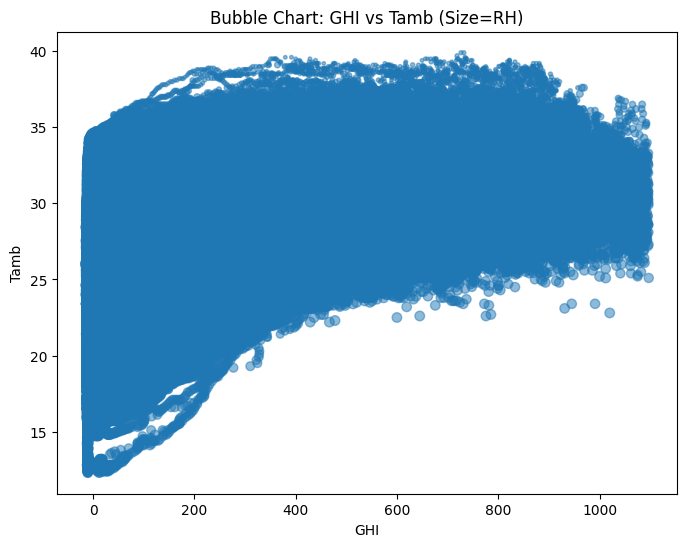

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(df_clean["GHI"], df_clean["Tamb"], s=df_clean["RH"]/2, alpha=0.5)
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.title("Bubble Chart: GHI vs Tamb (Size=RH)")
plt.show()